In [324]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import re

# Load the datasets
df = pd.read_excel('./merged_weather_flood_data.xlsx')



# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# # Set 'date' as index
df = df.set_index('date')

df.dropna(inplace=True)
# Fill missing values with the average values of each column
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna(x.mode()[0]))


df.head()


,tempmax,tempmin,temp,dew,humidity,precip,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,description,state,lga,floodstats
date,,,,,,,,,,,,,,,,
2002-01-05,31.1,25.6,28.3,25.4,85.0,0.0,20.5,193.4,1010.0,90.0,5.3,0.71,0,Lagos,Badagry,0
2002-01-09,30.1,23.1,27.7,15.0,47.5,0.0,24.1,29.3,1011.0,90.0,1.0,0.85,0,Lagos,Isolo,0
2002-01-09,30.1,23.1,27.7,15.0,47.5,0.0,24.1,29.3,1011.0,90.0,1.0,0.85,0,Lagos,Ojokoro/Ifako,0
2002-01-13,30.1,20.1,25.0,12.1,46.9,0.0,20.5,0.4,1012.9,90.0,1.0,0.00,0,Lagos,Ojo,0
2002-01-13,30.1,20.1,25.0,12.1,46.9,0.0,20.5,0.4,1012.9,90.0,1.0,0.00,0,Lagos,Amuwo-odofin,0


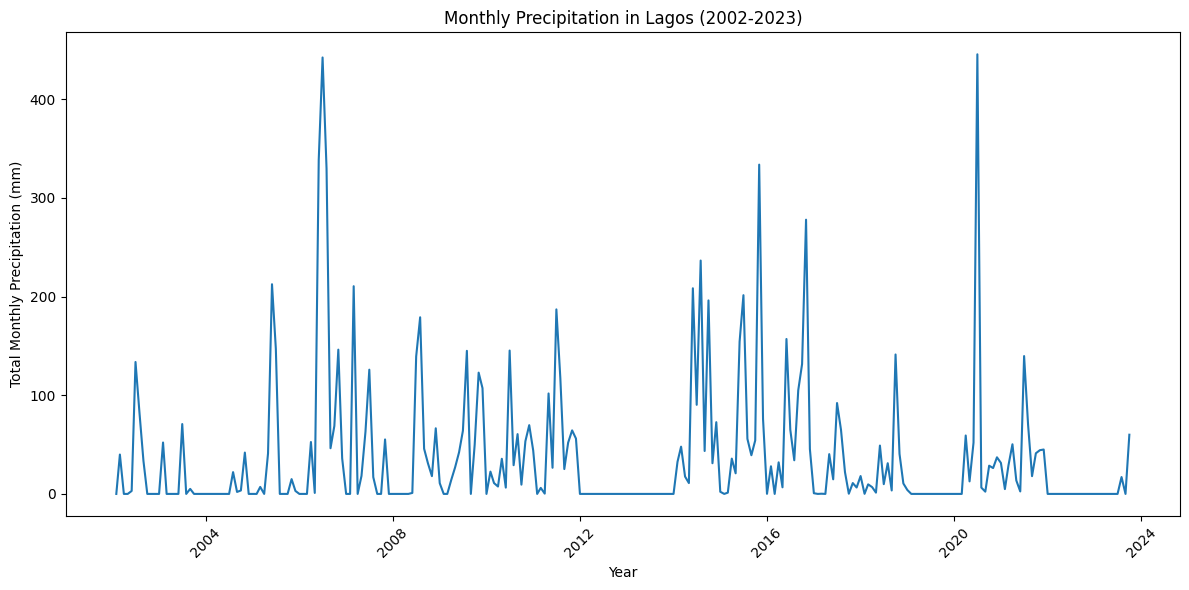

In [325]:
# Fill missing values with the average values of each column
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna(x.mode()[0]))
# Inspect the first few rows of each dataframe to understand the structure

# # Calculate monthly precipitation
monthly_precip = df.resample('M')['precip'].sum()

# Plot monthly precipitation
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_precip.index, y=monthly_precip.values)
plt.title('Monthly Precipitation in Lagos (2002-2023)')
plt.xlabel('Year')
plt.ylabel('Total Monthly Precipitation (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [326]:
# Print summary statistics
print('Summary Statistics for Precipitation (mm):')
df['precip'].describe()

Summary Statistics for Precipitation (mm):


count    1879.000000
mean        5.174880
std        19.286163
min         0.000000
25%         0.000000
50%         0.000000
75%         1.100000
max       271.500000
Name: precip, dtype: float64

In [327]:
# Find months with highest precipitation
top_5_months = monthly_precip.nlargest(5)
print('\
Top 5 Months with Highest Precipitation:')
print(top_5_months)

# Calculate average precipitation by month
avg_monthly_precip = df.groupby(df.index.month)['precip'].mean()
print('\
Average Precipitation by Month:')
print(avg_monthly_precip)

Top 5 Months with Highest Precipitation:
date
2020-06-30    445.5
2006-06-30    442.3
2006-05-31    338.6
2015-10-31    333.7
2006-07-31    329.7
Name: precip, dtype: float64
Average Precipitation by Month:
date
1      0.844578
2      2.609353
3      2.424561
4      2.284828
5      9.646377
6     13.153684
7      7.371282
8      2.379474
9      6.069930
10     8.778767
11     4.185430
12     0.687654
Name: precip, dtype: float64


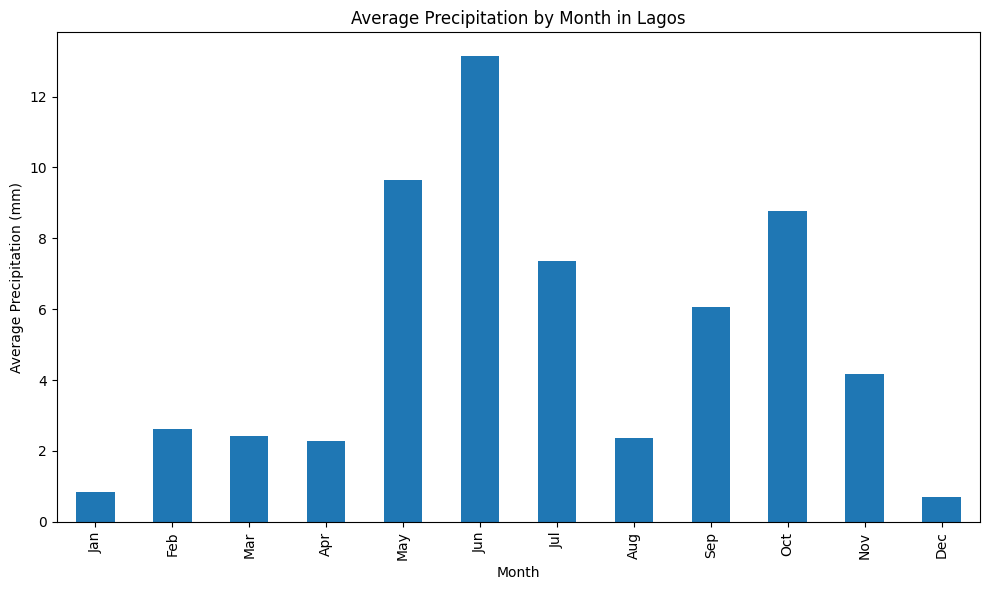

In [328]:
# Plot average precipitation by month
plt.figure(figsize=(10, 6))
avg_monthly_precip.plot(kind='bar')
plt.title('Average Precipitation by Month in Lagos')
plt.xlabel('Month')
plt.ylabel('Average Precipitation (mm)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

In [329]:
# Calculate the monthly sum of flood occurrences
monthly_floods = df.resample('M')['floodstats'].sum()

# Find the months with the highest flood occurrences
top_5_flood_months = monthly_floods.nlargest(5)
print('Top 5 Months with Highest Flood Occurrences:')
print(top_5_flood_months)

Top 5 Months with Highest Flood Occurrences:
date
2005-08-31    23
2015-08-31    23
2011-06-30    20
2020-08-31    19
2005-07-31    18
Name: floodstats, dtype: int64


Average Flooding by Month:
date
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     1.000000
7     1.000000
8     1.000000
9     1.000000
10    0.910959
11    0.000000
12    0.000000
Name: floodstats, dtype: float64


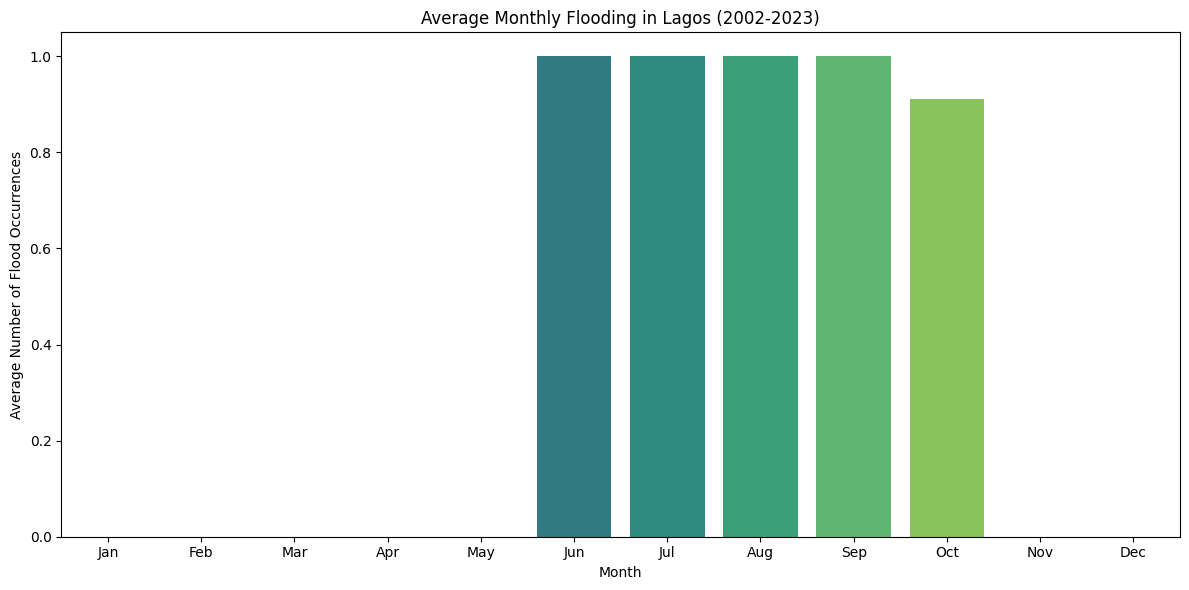

In [330]:
# Calculate the average flooding by month
avg_monthly_floods = df.groupby(df.index.month)['floodstats'].mean()
print('Average Flooding by Month:')
print(avg_monthly_floods)

# Plot the average flooding by month
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_monthly_floods.index, y=avg_monthly_floods.values,hue=avg_monthly_floods.index,palette='viridis',legend=False)
plt.title('Average Monthly Flooding in Lagos (2002-2023)')
plt.xlabel('Month')
plt.ylabel('Average Number of Flood Occurrences')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

In [342]:
# Encode categorical columns
categorical_cols = ['description', 'state', 'lga']
df_encoded = pd.get_dummies(df, columns=categorical_cols)


In [343]:
# Separate features and target
X = df[['precip']]  # Features
y = df_encoded['floodstats']


In [344]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [345]:
# Train a model (e.g., RandomForestClassifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [346]:

# Make predictions
y_pred = model.predict(X_test)


In [347]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.6356382978723404
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.85      0.72       210
           1       0.66      0.36      0.47       166

    accuracy                           0.64       376
   macro avg       0.64      0.61      0.60       376
weighted avg       0.64      0.64      0.61       376



In [368]:

# Generate dates for the next 12 months
dates = pd.date_range(start='2024-08-01', periods=12, freq='M')

# Simulate realistic values for all features (replace with actual or more realistic values if available)
np.random.seed(42)
new_data = pd.DataFrame({
    'date': dates,
    'tempmax': np.random.uniform(low=25, high=35, size=len(dates)),
    'tempmin': np.random.uniform(low=20, high=30, size=len(dates)),
    'temp': np.random.uniform(low=22, high=33, size=len(dates)),
    'dew': np.random.uniform(low=10, high=25, size=len(dates)),
    'humidity': np.random.uniform(low=60, high=100, size=len(dates)),
    'precip': np.random.uniform(low=0, high=20, size=len(dates)),
    'windspeed': np.random.uniform(low=0, high=10, size=len(dates)),
    'winddir': np.random.uniform(low=0, high=360, size=len(dates)),
    'sealevelpressure': np.random.uniform(low=1000, high=1020, size=len(dates)),
    'cloudcover': np.random.uniform(low=0, high=100, size=len(dates)),
    'visibility': np.random.uniform(low=5, high=10, size=len(dates)),
    'moonphase': np.random.uniform(low=0, high=1, size=len(dates)),
    'description': np.random.uniform(low=0, high=1, size=len(dates)), # Example value
    'state': ['Lagos']*len(dates),  # Example value
    'lga': ['Lagos Mainland']*len(dates)  # Example value
})

In [369]:
# Make predictions
new_data['flood_prediction'] = model.predict(new_data[['precip']])

In [370]:

# Present the predictions as a forecast
print('Forecast of Flood Predictions for the Next 12 Months:')
print(new_data[['date', 'flood_prediction']])

Forecast of Flood Predictions for the Next 12 Months:
         date  flood_prediction
0  2024-08-31                 0
1  2024-09-30                 1
2  2024-10-31                 1
3  2024-11-30                 0
4  2024-12-31                 1
5  2025-01-31                 1
6  2025-02-28                 1
7  2025-03-31                 1
8  2025-04-30                 1
9  2025-05-31                 1
10 2025-06-30                 1
11 2025-07-31                 1


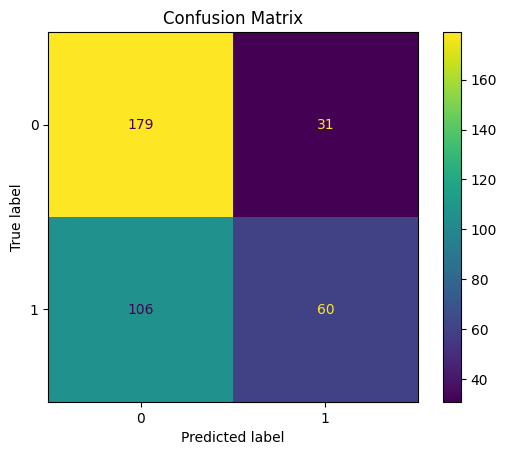

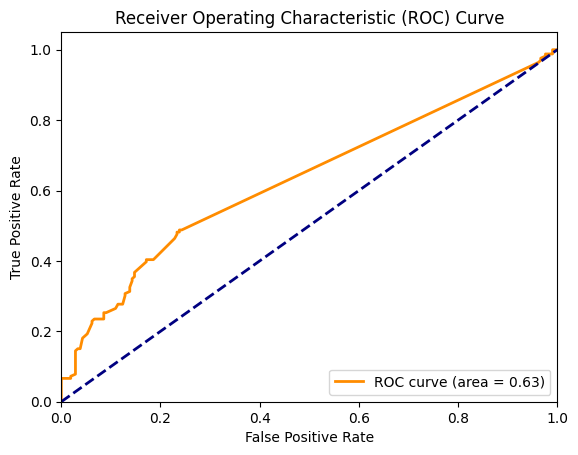

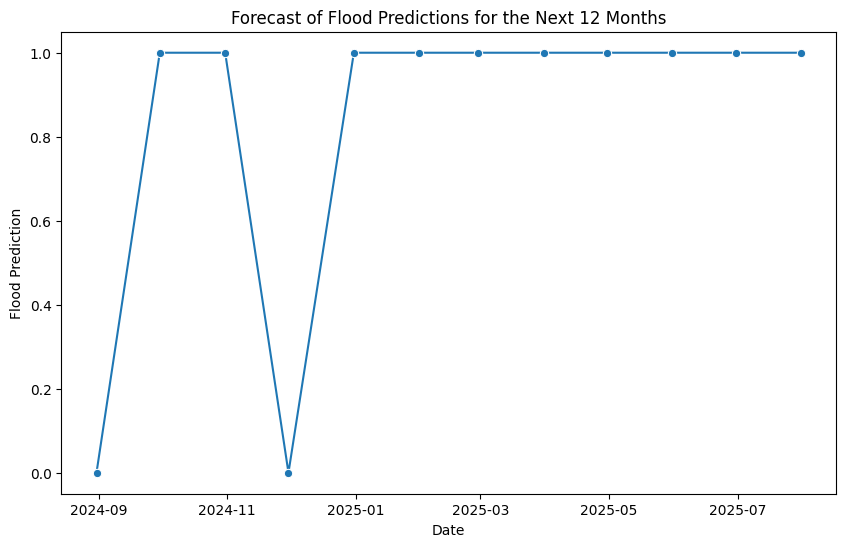

In [372]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Forecast Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(data=new_data, x='date', y='flood_prediction', marker='o')
plt.title('Forecast of Flood Predictions for the Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Flood Prediction')
plt.show()